# Splines cúbicos

In [2]:
def Spline(x: float, x0: float, pars: dict[str, float]) -> float:
    a = pars["a"]
    b = pars["b"]
    c = pars["c"]
    d = pars["d"]
    return a + b * (x - x0) + c * (x - x0) ** 2 + d * (x - x0) ** 3

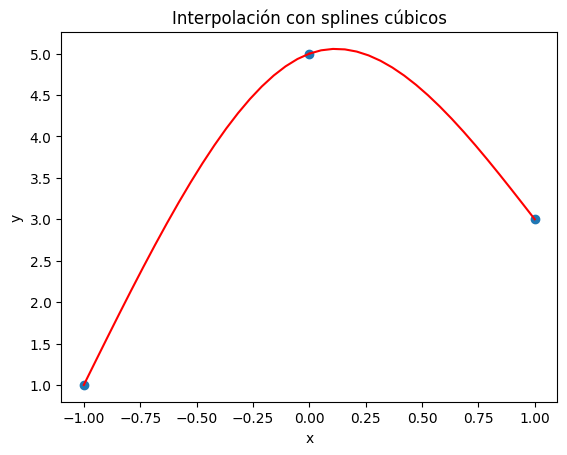

In [3]:
import matplotlib.pyplot as plt
import numpy as np

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline(_x, x_i, s[i])
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Interpolación con splines cúbicos")
plt.show()

# RESOLUCION EXAMEN SPLIN
* Grafique los splines cúbicos tal que cumplan con una pendiente de $m=2$ en los puntos dados.

In [13]:
def Spline_frontera_condicional(x, x_i, s, m=2, x1=0, y1=0):
    a, b, c, d = s["a"], s["b"], s["c"], s["d"]
    dx = x - x_i
    y = a + b * dx + c * dx**2 + d * dx**3
    
    # Aplicar la condición de frontera
    if np.any(x == x1):
        y = np.where(x == x1, y1 + m * (x - x1), y)
    
    return y

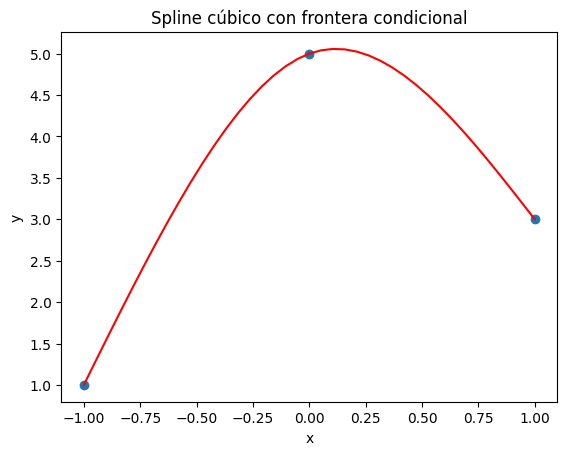

In [19]:
import matplotlib.pyplot as plt
import numpy as np


xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]

# Parámetros de la frontera condicional
m = 2
x1 = 0
y1 = 5

for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline_frontera_condicional(_x, x_i, s[i], m=m, x1=x1, y1=y1)
    plt.plot(_x, _y, color="red")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spline cúbico con frontera condicional")
plt.show()

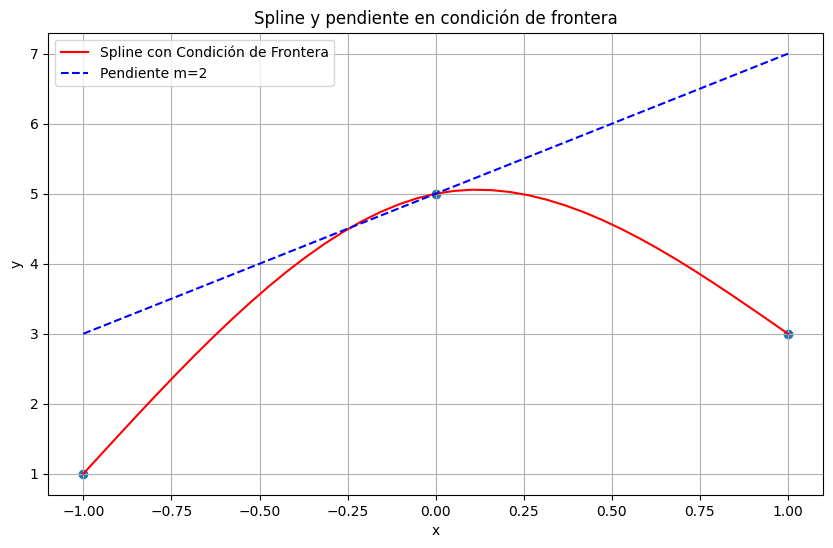

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def Spline_frontera_condicional(x, x_i, s, m=2, x1=0, y1=0):
    a, b, c, d = s["a"], s["b"], s["c"], s["d"]
    dx = x - x_i
    y = a + b * dx + c * dx**2 + d * dx**3
    
    # Aplicar la condición de frontera
    if np.any(x == x1):
        y = np.where(x == x1, y1 + m * (x - x1), y)
    
    return y

xs = [-1, 0, 1]
ys = [1, 5, 3]
s = [
    {"a": 1, "b": 5.5, "c": 0, "d": -1.5},
    {"a": 5, "b": 1, "c": -4.5, "d": 1.5},
]

# Parámetros de la frontera condicional
m = 2
x1 = 0
y1 = 5

plt.figure(figsize=(10, 6))

# Gráfica con condición de frontera
for i, x_i in enumerate(xs[:-1]):
    _x = np.linspace(x_i, xs[i + 1], 20)
    _y = Spline_frontera_condicional(_x, x_i, s[i], m=m, x1=x1, y1=y1)
    plt.plot(_x, _y, color="red", label="Spline con Condición de Frontera" if i == 0 else "")

# Agregar la línea de pendiente m = 2 en el punto (x1, y1)
tangent_x = np.linspace(x1 - 1, x1 + 1, 100)
tangent_y = y1 + m * (tangent_x - x1)
plt.plot(tangent_x, tangent_y, color="blue", linestyle="--", label=f"Pendiente m={m}")

plt.scatter(xs, ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Spline y pendiente en condición de frontera")
plt.legend()
plt.grid(True)
plt.show()